In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
import math

plt.rcParams["text.usetex"] = False

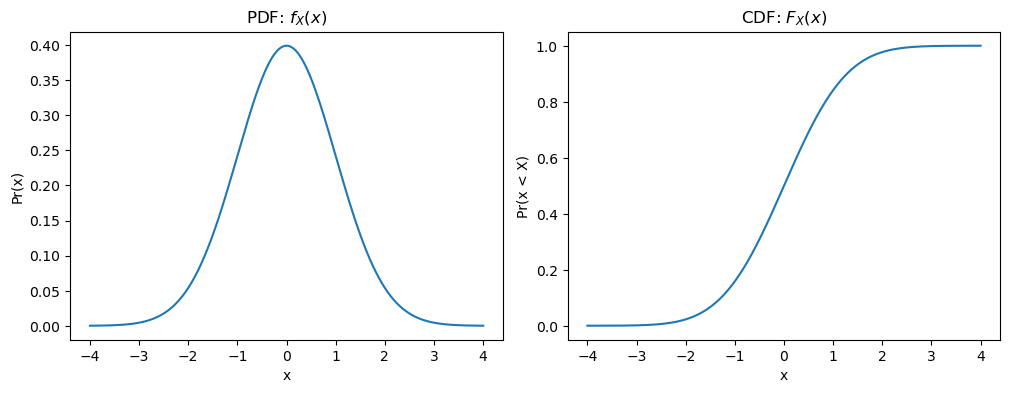

In [79]:
### GAUSSIAN PDF AND CDF FIGURES ###

# Initial parameters
mean = 0
var = 1
std = math.sqrt(var)
samples = np.linspace(-4,4,1000)

# Calculate gaussian pdf 
gaussPDF = 1/(np.sqrt(2*np.pi*var)) * np.exp(-(((samples-mean)**2)/(2*var)))

# Calculate gaussian cdf
gaussCDF = 0.5 * (1+special.erf((samples-mean)/(std*math.sqrt(2))))

# Plot gaussian pdf
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
ax[0].plot(samples,gaussPDF)
ax[1].plot(samples,gaussCDF)
ax[0].set_ylabel("Pr(x)")
ax[0].set_xlabel("x")
ax[0].set_title("PDF: $f_X(x)$")
ax[1].set_ylabel("Pr(x < X)")
ax[1].set_xlabel("x")
ax[1].set_title("CDF: $F_X(x)$")
fig.subplots_adjust(wspace=0.15)